In [1]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from SanaM import SpectralDataset, SanaModel, ModelTrainer
from torch.utils.data import DataLoader
from torch.nn import BCELoss
import torch

In [2]:
path = r"C:\Users\Acer\Documents\python\Proyecto de investigacion\sets"
path = path.replace('\\', '/')

file = 'datos.csv'
file = os.path.join(path, file)

df = pd.read_csv(file, sep=';')

X_df = df.iloc[:, 4:].values
y_df = df['Sana'].values


X_train, X_test, y_train, y_test = train_test_split(
    X_df,
    y_df,
    test_size=0.2,
    random_state=29
)

dataset_train = SpectralDataset(inputs=X_train, labels=y_train)
dataset_valid = SpectralDataset(inputs=X_test, labels=y_test)


train_dl = DataLoader(dataset_train, batch_size=32, shuffle=True)
valid_dl = DataLoader(dataset_valid, batch_size=32, shuffle=True)

Epoch 1 / 250: Training Loss: 0.7290, Training Accuracy: 0.5971, Validation Loss: 0.7017, Validation Accuracy: 0.3604
Epoch 2 / 250: Training Loss: 0.6672, Training Accuracy: 0.6080, Validation Loss: 0.6986, Validation Accuracy: 0.4146
Epoch 3 / 250: Training Loss: 0.6677, Training Accuracy: 0.6090, Validation Loss: 0.6999, Validation Accuracy: 0.3875
Epoch 4 / 250: Training Loss: 0.6690, Training Accuracy: 0.6080, Validation Loss: 0.7001, Validation Accuracy: 0.3604
Epoch 5 / 250: Training Loss: 0.6666, Training Accuracy: 0.6109, Validation Loss: 0.7045, Validation Accuracy: 0.3333
Epoch 6 / 250: Training Loss: 0.6674, Training Accuracy: 0.6071, Validation Loss: 0.7016, Validation Accuracy: 0.3604
Epoch 7 / 250: Training Loss: 0.6664, Training Accuracy: 0.6128, Validation Loss: 0.7023, Validation Accuracy: 0.3604
Epoch 8 / 250: Training Loss: 0.6677, Training Accuracy: 0.6109, Validation Loss: 0.7047, Validation Accuracy: 0.3333
Epoch 9 / 250: Training Loss: 0.6682, Training Accuracy:

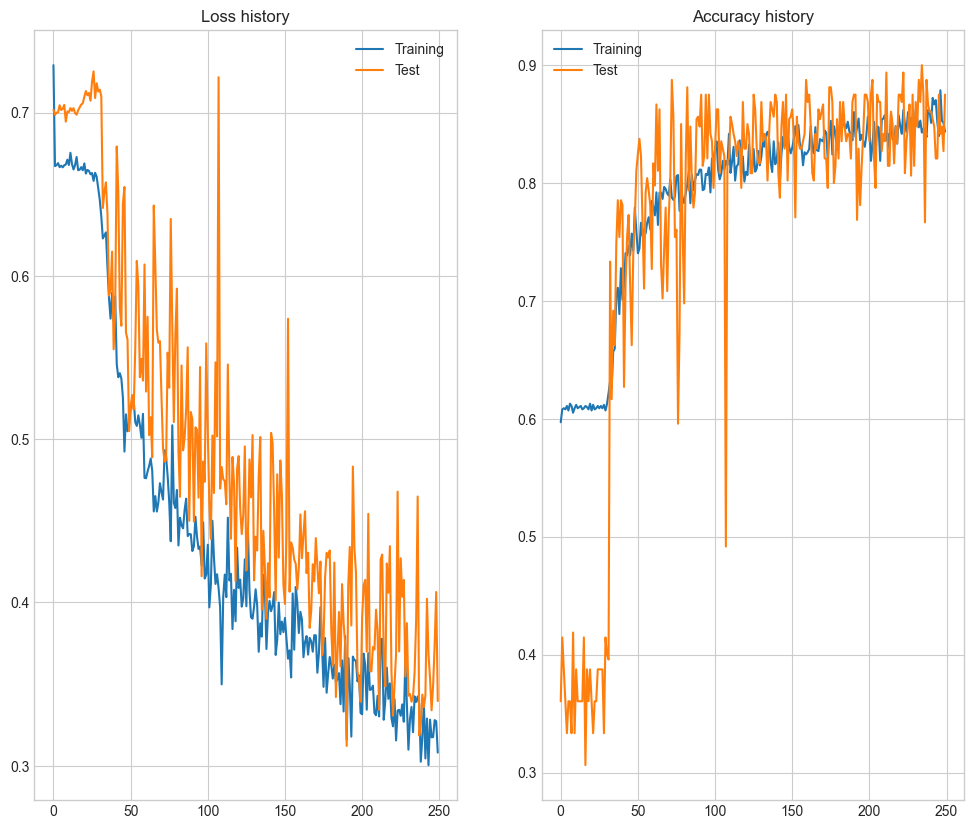

In [3]:
model = SanaModel()

loss_fn = BCELoss()

optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

trainer = ModelTrainer(model, loss_fn, optimizer)

num_epochs = 250


trainer.train_model(train_dl, valid_dl, num_epochs)
trainer.plot_learning_curve()